___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
x_train[0].shape

(28, 28)

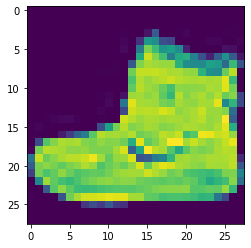

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

9

In [7]:
classes[9]

'Ankle boot'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
x_train.max()

255

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [13]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test = to_categorical(y_test)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [20]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3)

In [23]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.4122 - accuracy: 0.8580 - val_loss: 0.3240 - val_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3021 - accuracy: 0.8957 - val_loss: 0.3156 - val_accuracy: 0.8943
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2834 - accuracy: 0.9024 - val_loss: 0.3140 - val_accuracy: 0.8927
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2767 - accuracy: 0.9039 - val_loss: 0.2942 - val_accuracy: 0.8970
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2755 - accuracy: 0.9044 - val_loss: 0.3177 - val_accuracy: 0.8949
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2709 - accuracy: 0.9073 - val_loss: 0.3039 - val_accuracy: 0.8991
Epoch 7/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2671 - accuracy: 0.9094 - val_loss: 0.3079 -

**TASK 7: Plot values of metrics you used in your model.**

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.412223,0.858000,0.323974,0.8875
1,0.302060,0.895700,0.315577,0.8943
2,0.283372,0.902383,0.313984,0.8927
3,0.276727,0.903933,0.294181,0.8970
4,0.275494,0.904400,0.317665,0.8949
5,0.270934,0.907333,0.303864,0.8991
6,0.267053,0.909433,0.307922,0.8980
7,0.263624,0.911683,0.319034,0.8929
8,0.263304,0.912067,0.386919,0.8818


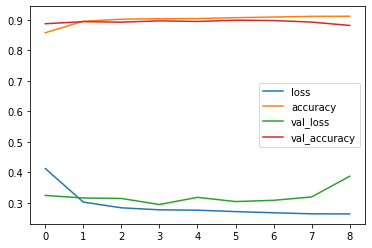

In [25]:
loss_df.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3869 - accuracy: 0.8818


[0.3869185149669647, 0.8817999958992004]

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict(x_test)
predictions

array([[3.6693034e-11, 1.3743877e-16, 1.2110098e-11, ..., 7.3331088e-04,
        5.4743265e-07, 9.9914253e-01],
       [2.3225672e-09, 6.5582247e-26, 9.9999964e-01, ..., 4.0612629e-20,
        2.2291773e-13, 9.5476876e-20],
       [1.5317193e-09, 1.0000000e+00, 5.6875793e-12, ..., 1.9867247e-11,
        8.1604293e-11, 2.4840750e-12],
       ...,
       [3.0600907e-11, 4.9779684e-31, 5.8214425e-13, ..., 7.8171851e-14,
        1.0000000e+00, 2.9322060e-17],
       [4.1410626e-09, 9.9999940e-01, 2.0736187e-11, ..., 1.6389860e-10,
        6.2884742e-10, 1.2663852e-09],
       [5.6629051e-05, 2.8112323e-08, 5.3046620e-04, ..., 9.0282306e-02,
        2.4586743e-02, 5.9506128e-04]], dtype=float32)

In [30]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5])

In [31]:
y_cat_test.shape

(10000, 10)

In [32]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1000
           1       1.00      0.96      0.98      1000
           2       0.90      0.72      0.80      1000
           3       0.91      0.87      0.89      1000
           4       0.77      0.89      0.82      1000
           5       0.96      0.98      0.97      1000
           6       0.61      0.82      0.70      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



## Prediction

In [36]:
my_number = x_test[5]

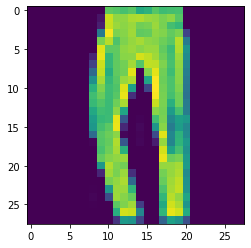

In [37]:
plt.imshow(my_number.reshape(28,28)); 

In [38]:
model.predict(my_number.reshape(1,28,28,1))

array([[3.5541339e-09, 1.0000000e+00, 1.8565072e-10, 2.5318818e-11,
        9.6021990e-10, 1.3698618e-09, 3.3847158e-09, 1.0346582e-11,
        4.1529513e-10, 1.1728009e-12]], dtype=float32)

In [39]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])

In [40]:
classes[1]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___